# 試験結果の分析

1. **量的データの基本統計量**
   - 母集団の分布を確認する。
   - 平均、分散、標準偏差、相関係数などの基本統計量を計算する。
   - 標本抽出し、母平均を推定する（点推定、区間推定）。標本数の例として10, 50, 100, 300などを使用する。

2. **仮説検定**
   - 量的データの検定:
     a. 科目平均の差に意味があるかどうかを検定する（データの対応あり）。
     b. 学生のプロフィールと成績に関係があるかどうかを検定する（データの対応なし）。
   - 名義データの検定:
     - race/ethnicity、parental level of education、lunchの間に関係があるかを検定する。

このNotebookには、量的データの基本統計量の計算、異なる標本サイズに対する点推定と区間推定、および仮説検定のためのセクションが含まれています。
特に、量的データに関する仮説検定の一部として、独立標本（例えば、性別と数学スコア間の関係）に対するt検定を行うためのコードも含まれています。


In [1]:

import pandas as pd
# import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


## データセット `exams.csv` (Large) の読み込み

In [121]:

# Load the dataset
file_path = './data/exams.csv'
exam_data = pd.read_csv(file_path)

# Display the first few rows
exam_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some college,standard,completed,72,85,83
1,male,group C,high school,standard,completed,39,38,39
2,male,group C,high school,standard,completed,54,53,56
3,female,group A,bachelor's degree,standard,completed,56,64,70
4,male,group C,some college,free/reduced,none,70,72,66


## 1. 量的データの分析
### 1.1 母集団の分布の確認

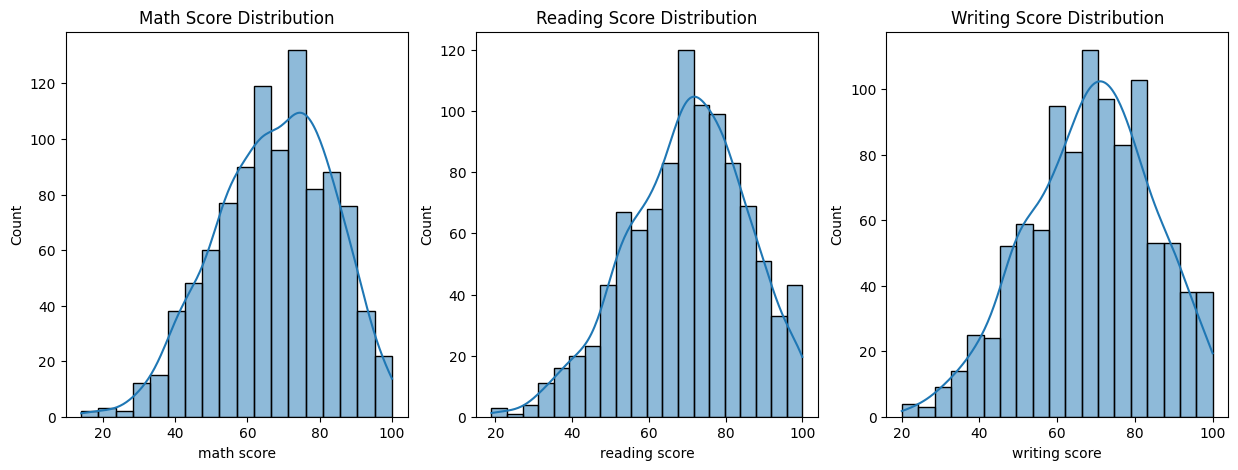

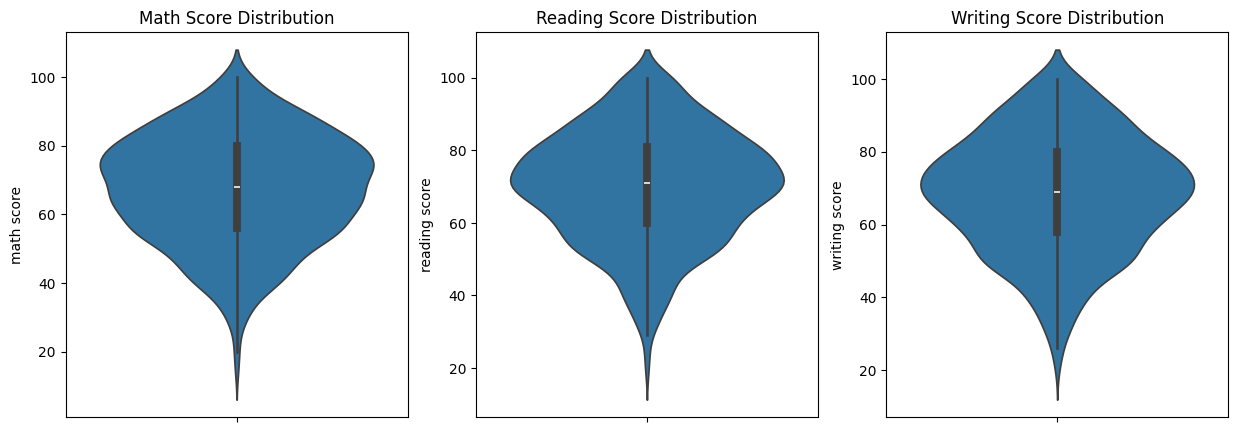

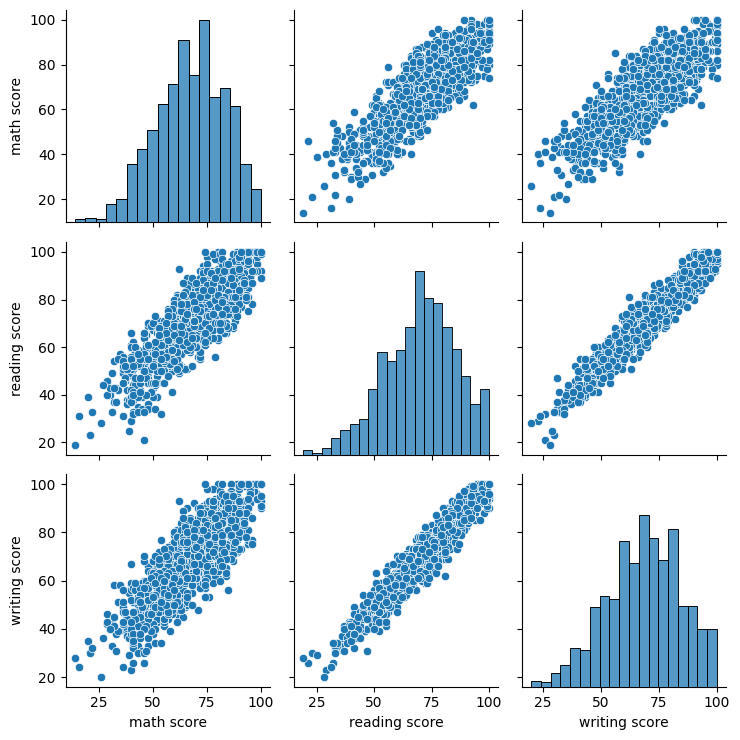

In [122]:

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.histplot(exam_data['math score'], kde=True)
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.histplot(exam_data['reading score'], kde=True)
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.histplot(exam_data['writing score'], kde=True)
plt.title('Writing Score Distribution')


# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=exam_data, y='math score')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=exam_data, y='reading score')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=exam_data, y='writing score')
plt.title('Writing Score Distribution')

sns.pairplot(exam_data)

plt.tight_layout()
plt.show()




### 1.2 平均、分散、標準偏差、相関係数などの基本統計量の計算

In [123]:
# Calculate mean, variance, standard deviation, and correlation coefficient
mean_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].mean()).rename(columns={0: '母平均m'})
variance_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].var()).rename(columns={0: '母分散σ^2'})
std_dev_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].std()).rename(columns={0: '母標準偏差σ'})
correlation_scores = pd.DataFrame(exam_data[['math score', 'reading score', 'writing score']].corr()).rename(columns={0: '母集団の相関係数R'})

# Print the results
print("Mean Scores 母平均m:")
print(mean_scores)
print("\nVariance Scores 母分散σ^2:")
print(variance_scores)
print("\nStandard Deviation Scores 母標準偏差σ:")
print(std_dev_scores)
print("\nCorrelation Scores 母集団の相関係数R:")
print(correlation_scores)


Mean Scores 母平均m:
                 母平均m
math score     67.397
reading score  69.950
writing score  68.576

Variance Scores 母分散σ^2:
                   母分散σ^2
math score     252.930321
reading score  236.411912
writing score  256.993217

Standard Deviation Scores 母標準偏差σ:
                  母標準偏差σ
math score     15.903783
reading score  15.375692
writing score  16.031008

Correlation Scores 母集団の相関係数R:
               math score  reading score  writing score
math score       1.000000       0.832958       0.813456
reading score    0.832958       1.000000       0.954985
writing score    0.813456       0.954985       1.000000


### 1.3 標本の抽出と母平均の推定（点推定、区間推定）

In [124]:
# Function to estimate population mean from a sample
def estimate_population_mean(sample_sizes, confidence_level = 0.95):
    print(f"{confidence_level * 100}%信頼区間で計算します")
    estimates = {}
    for size in sample_sizes:
        sample = exam_data.sample(size)
        estimates[size] = pd.DataFrame()
        for subject in ['math score', 'reading score', 'writing score']:
            sample_mean = sample[subject].mean()
            ci_lower, ci_upper = stats.t.interval(
                confidence_level, 
                len(sample) - 1, 
                loc=sample_mean, 
                scale=stats.sem(sample[subject])
            )
            estimates[size][subject] = pd.Series({
                '母平均m': sample_mean, 
                '下限': ci_lower, 
                '上限': ci_upper
            })
    return estimates

# Sample sizes
sample_sizes = [10, 50, 100, 300]

# Estimate population mean for different sample sizes
estimates = estimate_population_mean(sample_sizes)

# Print the estimates
estimates

95.0%信頼区間で計算します


{10:       math score  reading score  writing score
 母平均m   64.700000      69.200000      67.400000
 下限     51.072498      54.905585      52.630579
 上限     78.327502      83.494415      82.169421,
 50:       math score  reading score  writing score
 母平均m    67.60000      68.880000        67.5400
 下限      63.54492      65.196996        63.6432
 上限      71.65508      72.563004        71.4368,
 100:       math score  reading score  writing score
 母平均m   67.700000      70.920000      69.290000
 下限     64.711141      68.068111      66.327094
 上限     70.688859      73.771889      72.252906,
 300:       math score  reading score  writing score
 母平均m   66.556667      69.280000      67.716667
 下限     64.721962      67.519113      65.856456
 上限     68.391371      71.040887      69.576878}

## 2. 仮説検定
### 2.1 量的データの検定

In [125]:
hypothsis_sample_size = 60
sample_exam_data = exam_data.sample(hypothsis_sample_size)
sample_exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
928,female,group B,high school,standard,completed,85,95,90
354,male,group B,some high school,standard,none,59,54,48
809,female,group A,some high school,free/reduced,none,36,52,43
356,female,group E,some high school,free/reduced,none,44,53,52
639,male,group A,some high school,standard,none,84,79,74


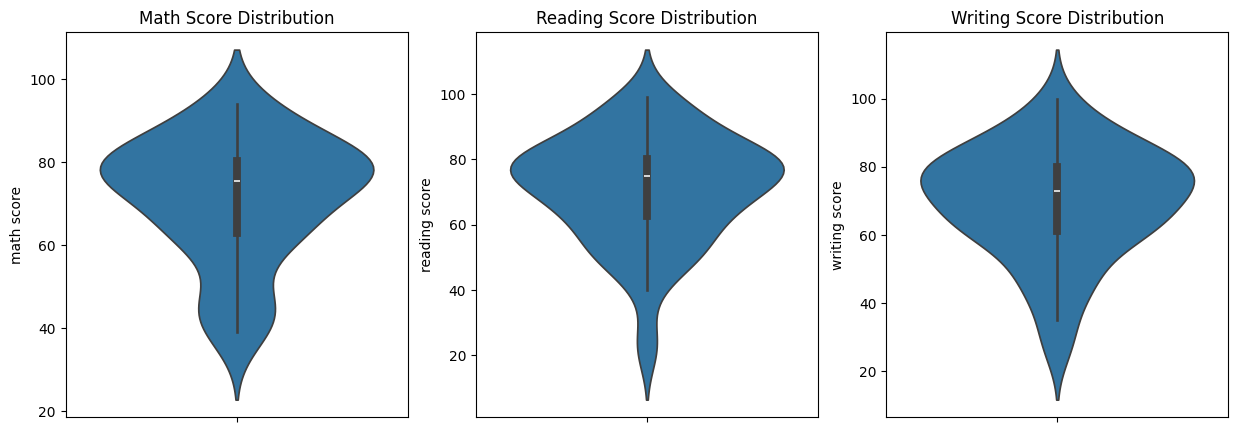

math scoreとreading scoreのt検定
         t値       p値   有意水準  自由度  帰無仮説の採択
0  0.271531  0.78693  95.0%   59     True


math scoreとwriting scoreのt検定
         t値        p値   有意水準  自由度  帰無仮説の採択
0  1.356323  0.180164  95.0%   59     True


reading scoreとwriting scoreのt検定
        t値        p値   有意水準  自由度  帰無仮説の採択
0  2.11728  0.038461  95.0%   59    False




In [126]:

# Paired Data Testing (e.g., Math and Reading scores)
# H0: There is no significant difference in the mean scores of two subjects
# H1: There is a significant difference in the mean scores
# Performing paired t-test
def ttest_paired(sample1, sample2, confidence_level=0.95):
    # Calculate the t, p between the samples
    t, p = stats.ttest_rel(sample1, sample2)

    return pd.DataFrame({
        't値': [t],
        'p値': [p],
        '有意水準': [f"{confidence_level * 100}%"],
        '自由度': [len(sample1) - 1],
        '帰無仮説の採択': [p > (1 - confidence_level)] 
    })

score_columns = ['math score', 'reading score', 'writing score']

all_subject_pairs = [(score_columns[i], score_columns[j]) for i in range(len(score_columns)) for j in range(i+1, len(score_columns)) if i != j]

# Perform t-test for all subject pairs

# Plotting distributions of scores
plt.figure(figsize=(15, 5))
# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score')
plt.title('Math Score Distribution')
# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score')
plt.title('Reading Score Distribution')
# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score')
plt.title('Writing Score Distribution')
plt.show()

for subject1, subject2 in all_subject_pairs:
    print(f"{subject1}と{subject2}のt検定")
    print(ttest_paired(sample_exam_data[subject1], sample_exam_data[subject2]))
    print("\n")

In [127]:

subjects = ['math score', 'reading score', 'writing score']

# Unpaired Data Testing (e.g., Scores of male and female)
# H0: There is no significant difference in the mean scores of the same subject for two certain groups
# H1: There is a significant difference in the mean scores...
# Performing paired t-test
def ttest_unpaired(sample_df1, sample_df2, confidence_level=0.95):
    # Calculate the t, p between the samples
    t_values = []
    p_values = []
    h0_accepts = []
    for subject in subjects:
        t, p = stats.ttest_ind(sample_df1[subject], sample_df2[subject])
        t_values.append(t)
        p_values.append(p)
        h0_accepts.append(p > (1 - confidence_level))
    return pd.DataFrame({
        't値': t_values,
        'p値': p_values,
        '帰無仮説の採択': h0_accepts 
    }, index=subjects)


性別グループの間で比較する成績の対応なしt検定


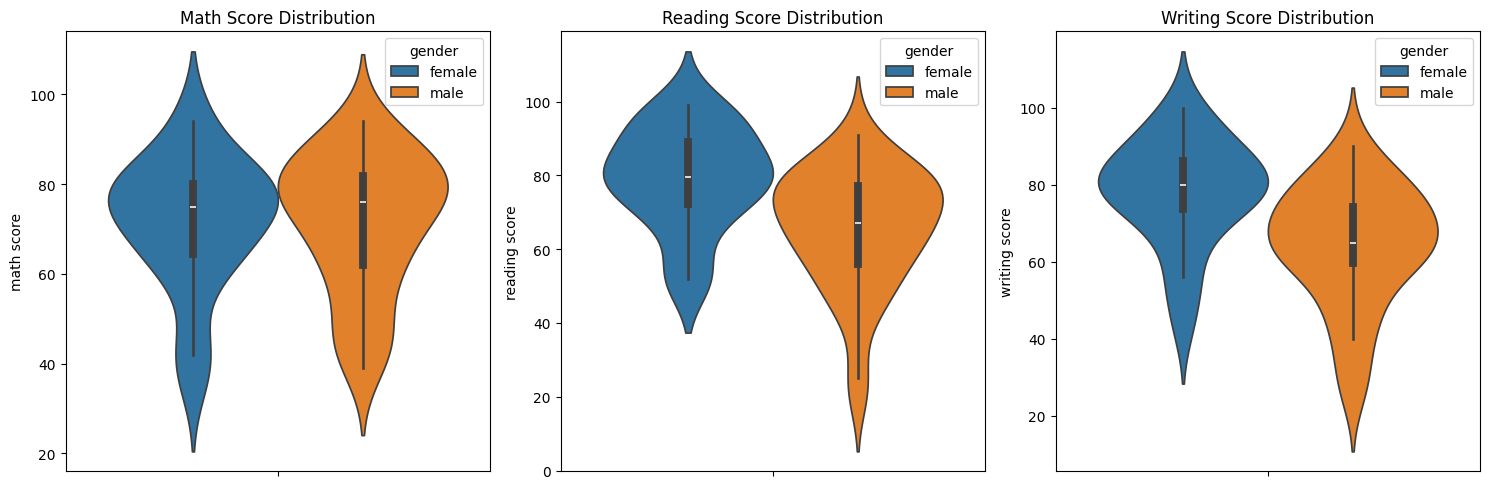

,t値,p値,帰無仮説の採択
math score,-0.045425,0.963924,True
reading score,-3.395864,0.001241,False
writing score,-3.541524,0.000792,False


In [128]:
# Perform t-test for all gender groups
print("性別グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', hue='gender')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', hue='gender')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', hue='gender')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

sample_male_exam_data = sample_exam_data[sample_exam_data['gender'] == 'male']
sample_female_exam_data = sample_exam_data[sample_exam_data['gender'] == 'female']
gender_ttest_result = ttest_unpaired(sample_male_exam_data, sample_female_exam_data)
gender_ttest_result

講義受講グループの間で比較する成績の対応なしt検定


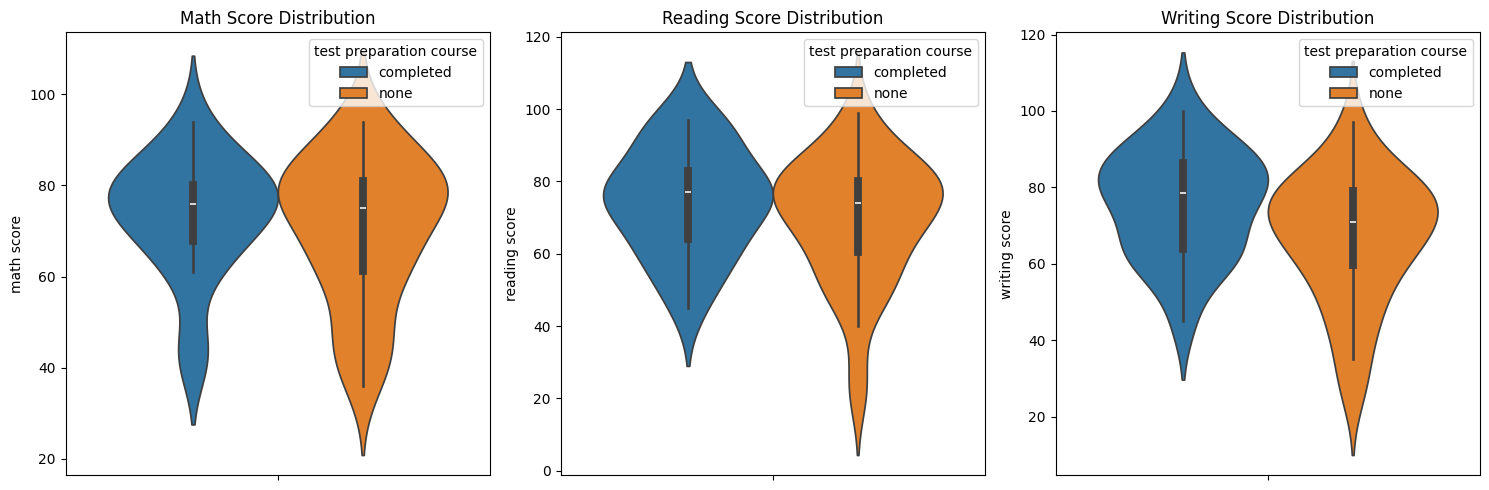

,t値,p値,帰無仮説の採択
math score,0.711179,0.479823,True
reading score,1.124634,0.265377,True
writing score,2.037907,0.046129,False


In [129]:
# Perform t-test for all prep groups
print("講義受講グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', hue='test preparation course')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', hue='test preparation course')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', hue='test preparation course')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

ttest_unpaired(sample_exam_data[sample_exam_data['test preparation course'] == 'completed'], sample_exam_data[sample_exam_data['test preparation course'] == "none"])

給食グループの間で比較する成績の対応なしt検定


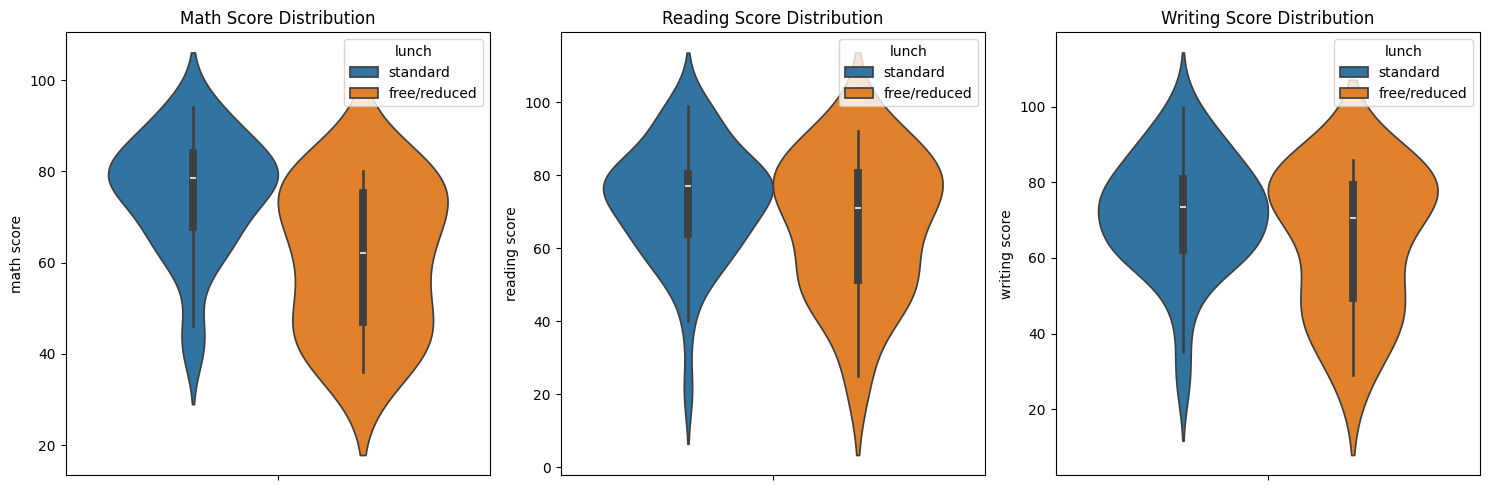

,t値,p値,帰無仮説の採択
math score,3.559276,0.000750,False
reading score,1.400975,0.166549,True
writing score,1.499000,0.139297,True


In [130]:
# Perform t-test for all gender groups
print("給食グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', hue='lunch')
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', hue='lunch')
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', hue='lunch')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

ttest_unpaired(sample_exam_data[sample_exam_data['lunch'] == 'standard'], sample_exam_data[sample_exam_data['lunch'] == "free/reduced"])

人種グループの間で比較する成績の対応なしt検定


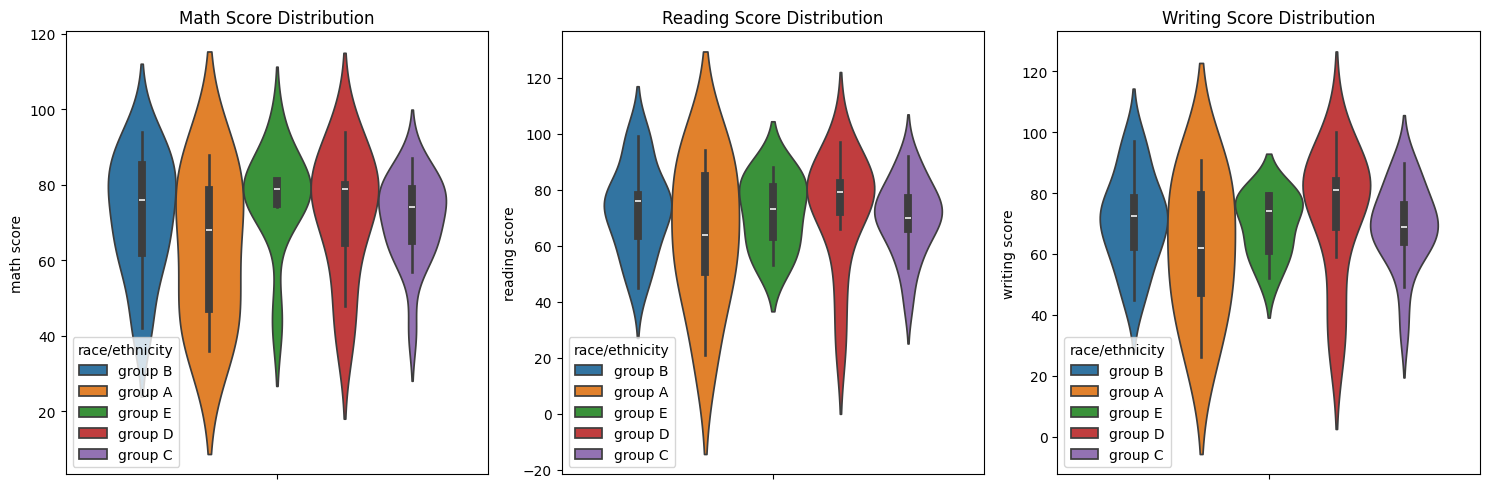



"group A" と "group B" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.116876  0.276664     True
reading score -1.017915  0.320303     True
writing score -1.178383  0.251825     True


"group A" と "group C" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.191599  0.246115     True
reading score -0.752636  0.459647     True
writing score -0.996690  0.329752     True


"group A" と "group D" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.011615  0.326777     True
reading score -0.774278  0.450057     True
writing score -1.060524  0.304654     True


"group A" と "group E" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.557335  0.141703     True
reading score -0.759437  0.460189     True
writing score -0.922618  0.371834     True


"group B" と "group C" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     0.209628  0.835329     True
reading score  0.578080  0.567386     True
writing score  0.3

In [131]:
# Perform t-test for all gender groups
print("人種グループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', hue="race/ethnicity")
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', hue="race/ethnicity")
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', hue="race/ethnicity")
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

race_groups = ["group A", "group B", "group C", "group D", "group E"]
all_race_group_pairs = [(race_groups[i], race_groups[j]) for i in range(len(race_groups)) for j in range(i+1, len(race_groups)) if i != j]

for (race1, race2) in all_race_group_pairs:
    print(f"\n\n\"{race1}\" と \"{race2}\" の対応なしt検定")
    print(ttest_unpaired(sample_exam_data[sample_exam_data["race/ethnicity"] == race1], sample_exam_data[sample_exam_data["race/ethnicity"] == race2]))

親の教育レベルグループの間で比較する成績の対応なしt検定


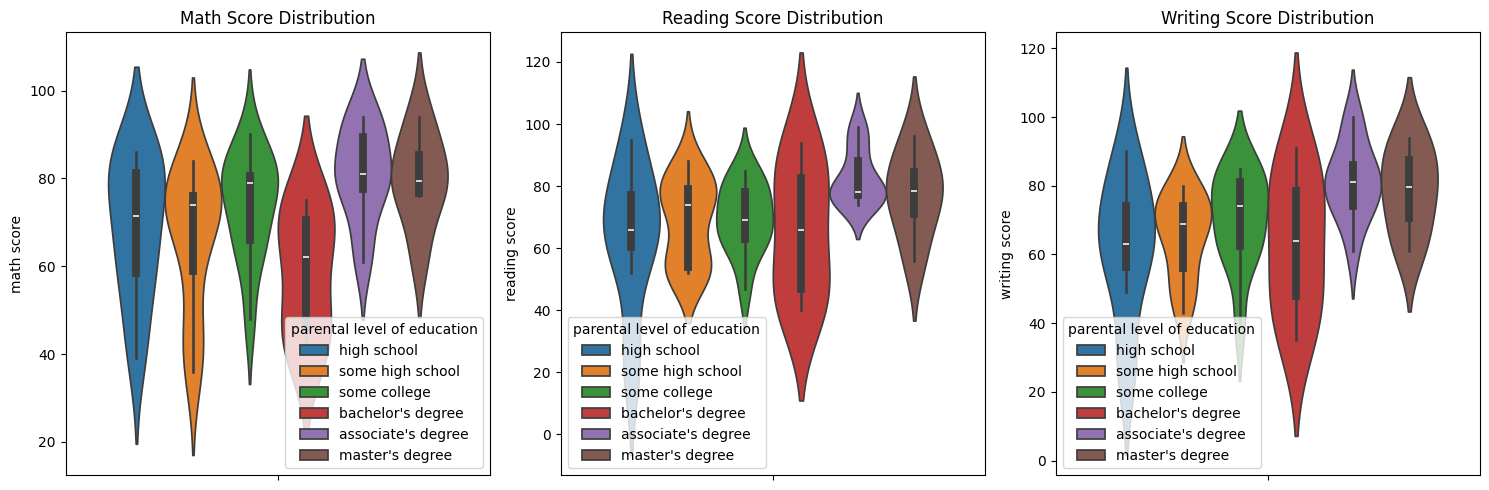



"some high school" と "high school" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -0.396802  0.695171     True
reading score  0.613109  0.545820     True
writing score  0.442301  0.662403     True


"some high school" と "some college" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.290128  0.210403     True
reading score -0.182144  0.857137     True
writing score -0.932619  0.361140     True


"some high school" と "associate's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -2.609698  0.015998    False
reading score -2.984444  0.006837    False
writing score -3.392503  0.002618    False


"some high school" と "bachelor's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score     1.057320  0.304350     True
reading score  0.392303  0.699441     True
writing score  0.280682  0.782155     True


"some high school" と "master's degree" の対応なしt検定
                     t値        p値  帰無仮説の採択
math score    -1.8928

In [132]:
# Perform t-test for all parental level of education groups
print("親の教育レベルグループの間で比較する成績の対応なしt検定")

# Plotting distributions of scores
plt.figure(figsize=(15, 5))

# Math score distribution
plt.subplot(1, 3, 1)
sns.violinplot(data=sample_exam_data, y='math score', hue="parental level of education")
plt.title('Math Score Distribution')

# Reading score distribution
plt.subplot(1, 3, 2)
sns.violinplot(data=sample_exam_data, y='reading score', hue="parental level of education")
plt.title('Reading Score Distribution')

# Writing score distribution
plt.subplot(1, 3, 3)
sns.violinplot(data=sample_exam_data, y='writing score', hue="parental level of education")
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

education_groups = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
all_education_group_pairs = [(education_groups[i], education_groups[j]) for i in range(len(education_groups)) for j in range(i+1, len(education_groups)) if i != j]

for (education1, education2) in all_education_group_pairs:
    print(f"\n\n\"{education1}\" と \"{education2}\" の対応なしt検定")
    print(ttest_unpaired(sample_exam_data[sample_exam_data["parental level of education"] == education1], sample_exam_data[sample_exam_data["parental level of education"] == education2]))

### 2.2 Nominal Data Testing

In [133]:
def chi2_test(col1, col2, confidence_level=0.95):
    # 連関表（クロス集計表）の作成
    contingency_table = pd.crosstab(col1, col2)

    # カイ二乗検定の実施
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # 結果の出力（日本語）
    print("カイ二乗統計量:", chi2)
    print("p値:", p)
    print("自由度:", dof)
    print("期待度数:", expected)
    print("帰無仮説の採択:", p > (1 - confidence_level))

    return contingency_table

In [134]:
chi2_test(sample_exam_data['race/ethnicity'], sample_exam_data['parental level of education'])

カイ二乗統計量: 12.569427643911986
p値: 0.8950848036590636
自由度: 20
期待度数: [[1.28333333 0.81666667 1.4        0.7        1.28333333 1.51666667]
 [2.93333333 1.86666667 3.2        1.6        2.93333333 3.46666667]
 [3.11666667 1.98333333 3.4        1.7        3.11666667 3.68333333]
 [2.01666667 1.28333333 2.2        1.1        2.01666667 2.38333333]
 [1.65       1.05       1.8        0.9        1.65       1.95      ]]
帰無仮説の採択: True


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,1,2,2,0,0,2
group B,3,2,4,2,2,3
group C,2,3,3,2,3,4
group D,3,0,2,1,4,1
group E,2,0,1,1,2,3


In [135]:
chi2_test(sample_exam_data['race/ethnicity'], sample_exam_data['lunch'])

カイ二乗統計量: 7.0326986683103
p値: 0.13417030728901178
自由度: 4
期待度数: [[ 1.86666667  5.13333333]
 [ 4.26666667 11.73333333]
 [ 4.53333333 12.46666667]
 [ 2.93333333  8.06666667]
 [ 2.4         6.6       ]]
帰無仮説の採択: True


lunch,free/reduced,standard
race/ethnicity,,
group A,2,5
group B,3,13
group C,2,15
group D,6,5
group E,3,6


In [136]:
chi2_test(sample_exam_data['lunch'], sample_exam_data['parental level of education'])

カイ二乗統計量: 0.6853090091726455
p値: 0.9837652113598715
自由度: 5
期待度数: [[2.93333333 1.86666667 3.2        1.6        2.93333333 3.46666667]
 [8.06666667 5.13333333 8.8        4.4        8.06666667 9.53333333]]
帰無仮説の採択: True


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,2,2,3,2,3,4
standard,9,5,9,4,8,9
